In [70]:
#import all the neccessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
#read the data
data=pd.read_csv('Information.csv',encoding='ISO-8859-1')
data.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [72]:
#check the shape of data
data.shape

(20050, 26)

In [73]:
#check the column names
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [74]:
#check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [75]:
#check the null values in each column
data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [76]:
#convert the column names to upper case
data.columns =data.columns.str.upper()
data.columns

Index(['_UNIT_ID', '_GOLDEN', '_UNIT_STATE', '_TRUSTED_JUDGMENTS',
       '_LAST_JUDGMENT_AT', 'GENDER', 'GENDER:CONFIDENCE', 'PROFILE_YN',
       'PROFILE_YN:CONFIDENCE', 'CREATED', 'DESCRIPTION', 'FAV_NUMBER',
       'GENDER_GOLD', 'LINK_COLOR', 'NAME', 'PROFILE_YN_GOLD', 'PROFILEIMAGE',
       'RETWEET_COUNT', 'SIDEBAR_COLOR', 'TEXT', 'TWEET_COORD', 'TWEET_COUNT',
       'TWEET_CREATED', 'TWEET_ID', 'TWEET_LOCATION', 'USER_TIMEZONE'],
      dtype='object')

In [77]:
#we will treat it as a NLP problem so delete all the unneccessary columns
data=data.drop([ '_GOLDEN', '_UNIT_STATE', '_TRUSTED_JUDGMENTS', 'PROFILE_YN',
       'PROFILE_YN:CONFIDENCE', 
       'GENDER_GOLD',  'PROFILE_YN_GOLD', 'NAME','FAV_NUMBER',
       'RETWEET_COUNT', 'SIDEBAR_COLOR', 'TWEET_COORD', 'PROFILEIMAGE',
       'TWEET_CREATED', 'TWEET_ID','_LAST_JUDGMENT_AT','TWEET_LOCATION', 'USER_TIMEZONE','LINK_COLOR','CREATED','_UNIT_ID'], axis = 1) 

In [78]:
#lowering the case of columns
data.columns =data.columns.str.lower()
data.columns

Index(['gender', 'gender:confidence', 'description', 'text', 'tweet_count'], dtype='object')

In [79]:
#check head after removing the unwanted columns
data.head()

,gender,gender:confidence,description,text,tweet_count
0,male,1.0000,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.6625,louis whining and squealing and all,i absolutely adore when louis starts the songs...,5617
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,31462


In [80]:
#percentage of null values
data.isnull().sum()/data.shape[0]

gender               0.004838
gender:confidence    0.001297
description          0.186733
text                 0.000000
tweet_count          0.000000
dtype: float64

In [81]:
#drop all the coluns that has null values
data.dropna(axis=0,how='any',inplace=True)

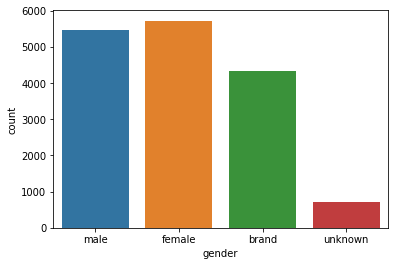

In [82]:
#check the no and counts of each gender in our dataset
ax = sns.countplot(data['gender'])

In [83]:
#let's have a look at the first description

for index,text in enumerate(data['description'][0:5]):
  print('Tweet %d:\n'%(index+1),text)

Tweet 1:
 i sing my own rhythm.
Tweet 2:
 I'm the author of novels filled with family drama and romance.
Tweet 3:
 louis whining and squealing and all
Tweet 4:
 Mobile guy.  49ers, Shazam, Google, Kleiner Perkins, Yahoo!, Sprint PCS, AirTouch, Air Force.  Stanford GSB, UVa.  Dad, Husband, Brother.  Golfer.
Tweet 5:
 Ricky Wilson The Best FRONTMAN/Kaiser Chiefs The Best BAND Xxxx Thank you Kaiser Chiefs for an incredible year of gigs and memories to cherish always :) Xxxxxxx


In [84]:
#let's have a look at the first tweet
for index,text in enumerate(data['text'][0:5]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
Review 2:
 ÛÏIt felt like they were my friends and I was living the story with themÛ https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz
Review 3:
 i absolutely adore when louis starts the songs it hits me hard but it feels good
Review 4:
 Hi @JordanSpieth - Looking at the url - do you use @IFTTT?!  Don't typically see an advanced user on the @PGATOUR! https://t.co/H68ou5PE9L
Review 5:
 Watching Neighbours on Sky+ catching up with the Neighbs!! Xxx _Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_ÙÈ_ÙÔ_ÙÈ Xxx


In [85]:
#reset index
data.reset_index(inplace=True)

In [86]:
## a function for doing text pre-processing

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

stop_words = nltk.corpus.stopwords.words("english")

def tweet_to_words(review):
  
  ''' Text pre-processing'''

  #remove punctuations and numbers
  letters_only = re.sub("[^a-zA-Z]"," ",review)
  
  # remove hyperlinks
  rem_hyp = re.sub(r'https?:\/\/.*[\r\n]*', '',letters_only)

  # remove old style retweet text "RT"
  o_tweet = re.sub(r'^RT[\s]+', '', rem_hyp)

  # remove hashtags
  # only removing the hash # sign from the word
  hash_t = re.sub(r'#', '', o_tweet) 

  #remove http
  has_t = re.sub(r'http', '', hash_t) 

  #lower the case of the words
  lower_case = has_t.lower()
  words = lower_case.split()
  
  #remove stop words
  words = [w for w in words if w not in stop_words]
  
  #lemmatize
  words = [lemmatizer.lemmatize(w) for w in words]
  return " ".join(words)

In [87]:
tweet_to_words(data['text'][0])

'robbie e responds critic win eddie edward worldtitleseries co nsybbmvjkz'

In [88]:
tweet_to_words(data['description'][0])

'sing rhythm'

In [89]:
##apply tweet_to_word on text coulmn
data['text'] = data['text'].apply(lambda x : (tweet_to_words(x)))

In [90]:
##apply tweet_to_word on description column
data['description'] = data['description'].apply(lambda x : (tweet_to_words(x)))

In [91]:
##drop the index column from the dataset
data.drop(columns='index',inplace=True)

In [92]:
##group the tweets by gender 
df_grouped=data[['gender','text']].groupby(by='gender').agg(lambda x:' '.join(x))
df_grouped.head()

,text
gender,
brand,bpackengineer thank patience take care issue t...
female,watching neighbour sky catching neighbs xxx xx...
male,robbie e responds critic win eddie edward worl...
unknown,fa lost fining club left right centre job prop...


In [93]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
df=cv.fit_transform(df_grouped['text'])
df_dtm = pd.DataFrame(df.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(4)

,aa,aaa,aaaaa,aaaaaaaa,aaaaaaall,aaaaahhhhhmmmm,aaahotdeal,aaallll,aaand,aaaree,...,zzksitayz,zzl,zzlo,zzmkqcw,zznuvc,zzp,zzv,zzxefkem,zzyjf,zzzzzzz
gender,,,,,,,,,,,,,,,,,,,,,
brand,3,1,0,0,0,0,2,0,0,1,...,0,0,0,0,1,1,1,0,1,0
female,0,0,0,1,1,1,0,1,0,0,...,1,1,0,1,0,0,0,1,0,0
male,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


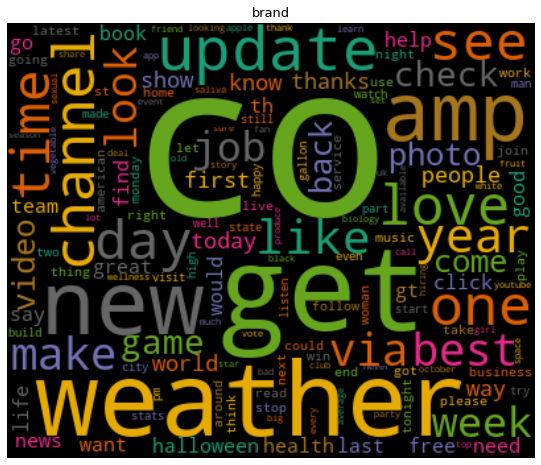

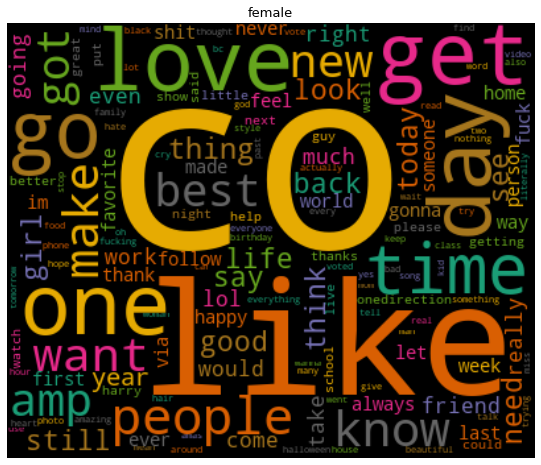

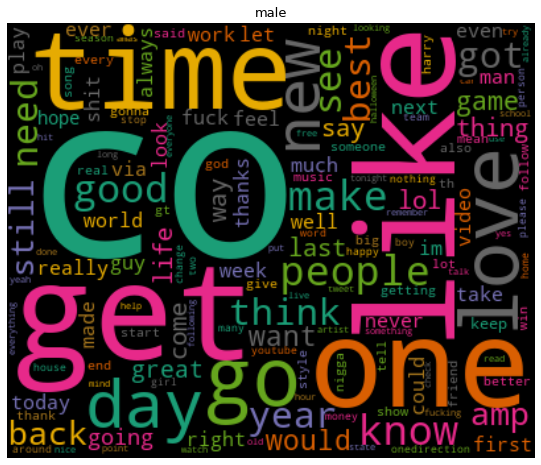

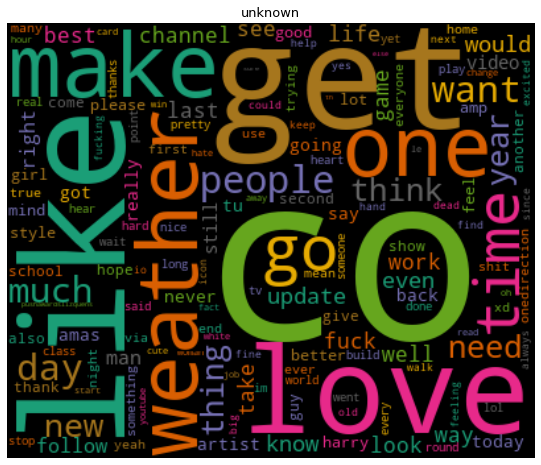

In [94]:
!pip install wordcloud
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [95]:
!pip install textblob
from textblob import TextBlob
data['polarity']=data['text'].apply(lambda x:TextBlob(x).sentiment.polarity)

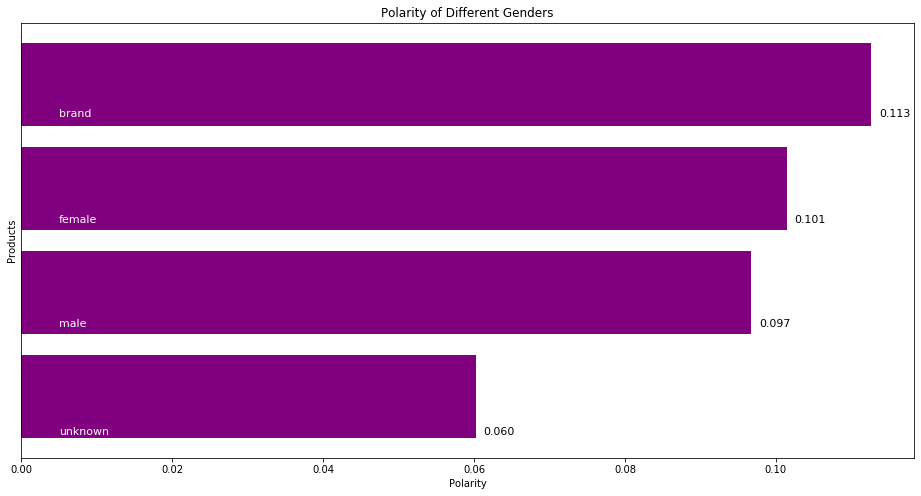

In [96]:
##check polariyt i.e most sentiment of each gender from the tweets using textblob 

gender_polarity_sorted=pd.DataFrame(data.groupby('gender')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Genders')
polarity_graph=plt.barh(np.arange(len(gender_polarity_sorted.index)),gender_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,gender in zip(polarity_graph,gender_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(gender),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,gender_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

##Model Building


###BoW method

In [97]:
##enoding gender in numeric format
data['gender'] = data['gender'].map({'male':0,'female':1,
                                     'brand':2, 'unknown':3})

In [98]:
##we are going to build our model to identify gender using tweets only

x = data['text']
y = data['gender']

In [99]:
## coutvectorizer or BoW method
vectorizer = CountVectorizer(analyzer= 'word',tokenizer=None,
                             preprocessor=None,stop_words=None,
                             max_features=8000)

In [100]:
##fit and transform countvectorizer on tweets
vectorizer.fit(x)
x_train = vectorizer.transform(x).toarray()

In [101]:
#check the shape 
print(x_train.shape,y.shape)

(16224, 8000) (16224,)


In [102]:
#spilt the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y,test_size=0.25,random_state=42)
print(x_train.shape,y_train.shape)

(12168, 8000) (12168,)


In [103]:
#implementing Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

#check accuracy
naive_acc = clf.score(x_train,y_train)
print(naive_acc)

0.7068540433925049


In [104]:
#implementing logistic regression
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()
lg_reg.fit(x_train,y_train)
predict = lg_reg.predict(x_test)

#check accuracy
log_acc = lg_reg.score(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [105]:
#implementing randomforest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42,n_estimators=200)
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

#check accuracy
rclf_acc = clf.score(x_train,y_train)

In [106]:
#compare the accuracy of all algorithms
BoW_acc = pd.DataFrame({'Algorithm_Name':['Naive_Bayes','Logistic_Regression','RandomForest',],'Accuracy':[naive_acc,log_acc,rclf_acc]})
print(BoW_acc)

        Algorithm_Name  Accuracy
0          Naive_Bayes  0.706854
1  Logistic_Regression  0.796187
2         RandomForest  0.982742


###TF-IDF Vectorizer


In [107]:
## import tfidfvectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfifvectorizer = TfidfVectorizer(analyzer= 'word',tokenizer=None,
                             preprocessor=None,stop_words=None,
                             max_features=8000)

In [108]:
##fit and transform tfidf vectorizer
tfifvectorizer.fit(x)
x_train = tfifvectorizer.transform(x).toarray()

In [109]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y,test_size=0.25,random_state=42)
print(x_train.shape,y_train.shape)

(12168, 8000) (12168,)


In [110]:
#implementing Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

#check accuracy
naive_acc = clf.score(x_train,y_train)


In [111]:
#implementing logistic regression
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()
lg_reg.fit(x_train,y_train)
predict = lg_reg.predict(x_test)

#check accuracy
log_acc = lg_reg.score(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [112]:
#implementing randomforest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42,n_estimators=200)
clf.fit(x_train,y_train)
predict = clf.predict(x_test)

# accuracy
rclf_acc = clf.score(x_train,y_train)

In [113]:
#compare the accuracy of all algorithms
Tfidf_acc = pd.DataFrame({'Algorithm_Name':['Naive_Bayes','Logistic_Regression','RandomForest'],'Accuracy':[naive_acc,log_acc,rclf_acc]})
print(Tfidf_acc)

        Algorithm_Name  Accuracy
0          Naive_Bayes  0.706936
1  Logistic_Regression  0.703813
2         RandomForest  0.982742


## KNN

In [114]:
#importing the required libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [115]:
pwd

'C:\\Users\\shreyas\\Downloads'

In [116]:
#Loading csv
df=pd.read_csv('Information.csv',encoding='ISO-8859-1')
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


## Filtering

In [117]:
df.columns =df.columns.str.upper()

In [118]:
df=df.drop([ '_GOLDEN', '_UNIT_STATE', 'PROFILE_YN',
       'PROFILE_YN:CONFIDENCE', 'GENDER_GOLD',  'PROFILE_YN_GOLD', 'PROFILEIMAGE', 'SIDEBAR_COLOR', 'TWEET_COORD', 
       'TWEET_CREATED', 'TWEET_ID','_LAST_JUDGMENT_AT','TWEET_LOCATION', 'USER_TIMEZONE','LINK_COLOR','CREATED','_UNIT_ID', 'DESCRIPTION','NAME','TEXT'], axis = 1) 

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 6 columns):
_TRUSTED_JUDGMENTS    20050 non-null int64
GENDER                19953 non-null object
GENDER:CONFIDENCE     20024 non-null float64
FAV_NUMBER            20050 non-null int64
RETWEET_COUNT         20050 non-null int64
TWEET_COUNT           20050 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 940.0+ KB


In [120]:
df.shape

(20050, 6)

In [121]:
#Replace zeroes
zeros_not_accepted = ['GENDER:CONFIDENCE','_TRUSTED_JUDGMENTS','FAV_NUMBER','TWEET_COUNT','RETWEET_COUNT']

for column in zeros_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

In [122]:
df.dropna(how = 'any', inplace = True)

In [123]:
df.shape

(19953, 6)

In [124]:
x = df[['GENDER:CONFIDENCE','_TRUSTED_JUDGMENTS','FAV_NUMBER','TWEET_COUNT','RETWEET_COUNT']] 
x.head()

,GENDER:CONFIDENCE,_TRUSTED_JUDGMENTS,FAV_NUMBER,TWEET_COUNT,RETWEET_COUNT
0,1.0000,3,5256.0,110964,2.0
1,1.0000,3,68.0,7471,2.0
2,0.6625,3,7696.0,5617,1.0
3,1.0000,3,202.0,1693,2.0
4,1.0000,3,37318.0,31462,2.0


In [125]:
y  = df.iloc[:, -5]
y.head()

0      male
1      male
2      male
3      male
4    female
Name: GENDER, dtype: object

## Splitting the data for Train and Test.

In [126]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.2)

In [127]:
#Feature scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [128]:
#Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors = 141, p = 2, metric='euclidean')

In [129]:
#Fit Model
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=141, p=2,
                     weights='uniform')

In [130]:
#Predict the test set results
y_pred = classifier.predict(x_test)
y_pred

array(['male', 'female', 'female', ..., 'male', 'female', 'male'],
      dtype=object)

In [131]:
#Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[794 195 217  17]
 [295 750 237   9]
 [354 522 334  19]
 [133  36  57  22]]


In [132]:
print(accuracy_score(y_test, y_pred))

0.4760711601102481
